# Drafting the prototype of what will be a module for adding filtered version of the image


In [6]:
%matplotlib inline

In [97]:
print(image.dtype) ##image = image.astype(np.uint8)

uint8


In [113]:
#You 
image = image.astype(np.uint16)
print(image.dtype) 

uint16


# FilterBasedTransformations: 
- smoothing: [4:16]
- noise: 

In [ ]:
from skimage import data
img = data.camera()

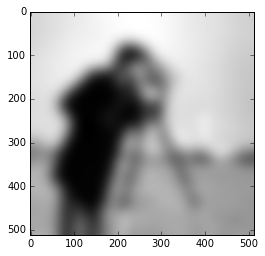

In [123]:
gaussian_param = 16 
import skimage.filter as filters

smooth = filters.gaussian(img, gaussian_param)
plt.imshow(smooth,cmap='gray');

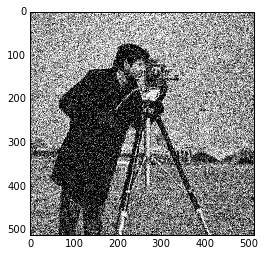

In [131]:
noise_var_param = 0.05
import skimage.util as util
out=util.random_noise(img, mode='gaussian', seed=None, clip=True, mean=0, var=var_param)
#plt.imshow(out,vmin=0,vmax=1, cmap='gray', interpolation='nearest');
plt.imshow(out, cmap='gray', interpolation='nearest');

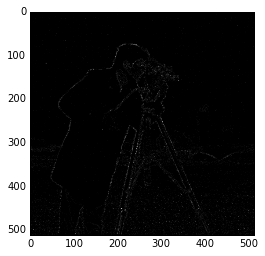

In [115]:
#this is NOT what you need if you want to add noise
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import noise_filter
img = data.camera()
out = noise_filter(img, disk(5))
plt.imshow(out,cmap='gray');

In [95]:
np.iinfo(np.uint16)

iinfo(min=0, max=65535, dtype=uint16)

In [116]:
import matplotlib.pyplot as plt
import numpy as np

image = np.zeros((20, 20), dtype=np.uint8)
image[5:15, 5:15] = 255

0 255 uint8


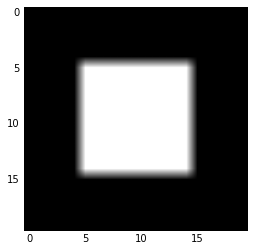

In [117]:
plt.imshow(image,cmap='gray'); #an input image
print(image.min(), image.max(), image.dtype)